<a href="https://colab.research.google.com/github/S-HILPA-S/CASE-STUDIES/blob/main/fish_unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [252]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

# Loading data set

In [253]:
from google.colab import files
uploaded = files.upload()
# we can get the user to upload the file here.

Saving fish.csv to fish (2).csv


In [254]:
df_fish = pd.read_csv("/content/fish.csv",header=None)
df_fish.head()

,0,1,2,3,4,5,6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [255]:
# defining functions to understanding the data

def perform_eda(df):
    print("\nInfo ")
    print("\n",df.info())


    print("\n \n \n Missing Values")
    print("\n",df.isnull().mean()*100)


    print("\n \n \n Checking Duplicates")
    print("\n RoW Duplicates",df.duplicated().sum())
    print("\n Column Duplicates",df.T.duplicated().sum())

    print("\n \nDescriptive Statistics")
    print("\n",df.describe())


    if 'Churn' in df.columns:
        print("\n \n Target Variable Distribution")
        print(df['Churn'].value_counts())


In [256]:
perform_eda(df_fish)


Info 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       85 non-null     object 
 1   1       85 non-null     float64
 2   2       85 non-null     float64
 3   3       85 non-null     float64
 4   4       85 non-null     float64
 5   5       85 non-null     float64
 6   6       85 non-null     float64
dtypes: float64(6), object(1)
memory usage: 4.8+ KB

 None

 
 
 Missing Values

 0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
dtype: float64

 
 
 Checking Duplicates

 RoW Duplicates 0

 Column Duplicates 0

 
Descriptive Statistics

                  1          2          3          4          5          6
count    85.000000  85.000000  85.000000  85.000000  85.000000  85.000000
mean    431.758824  27.338824  29.557647  33.120000  28.076471  12.865882
std     380.933962  11.289450  12.185045  13.197292  10.351543   2.117476
min    

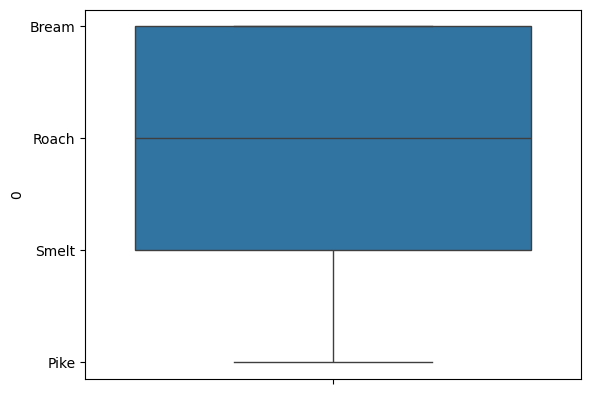

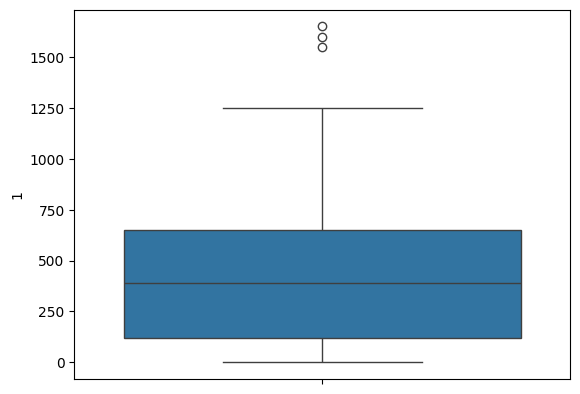

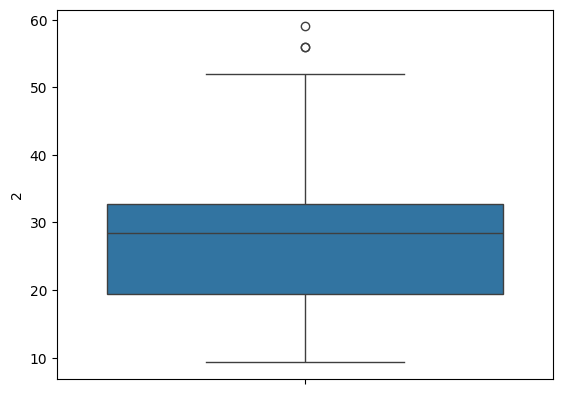

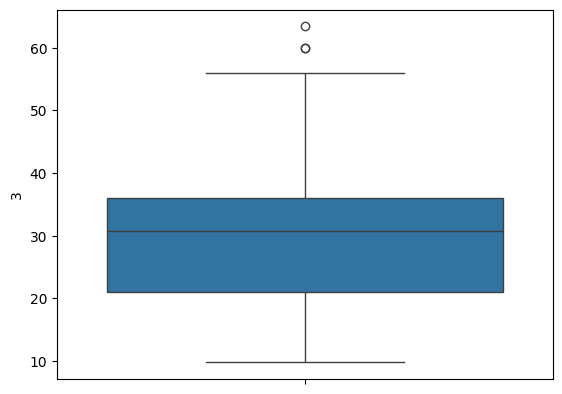

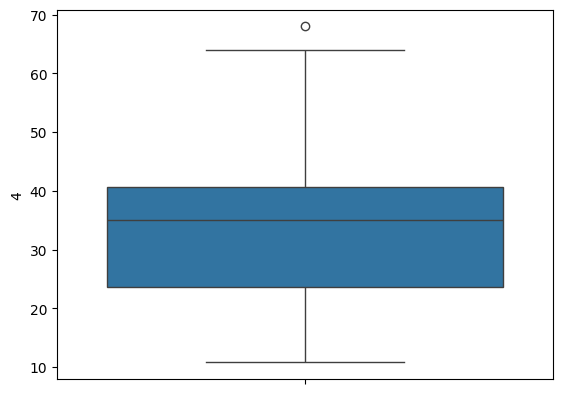

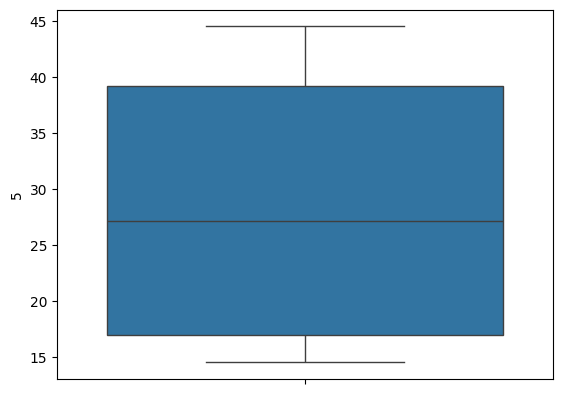

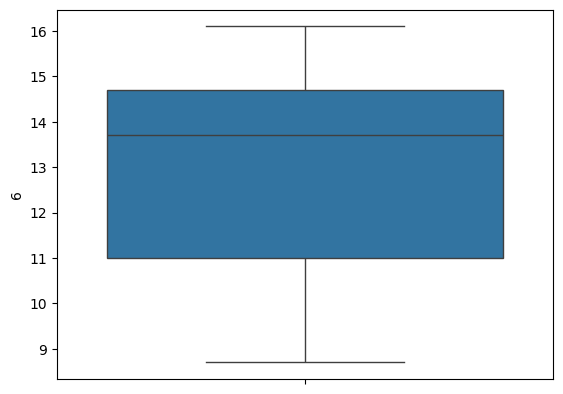

In [257]:
import seaborn as sns
for i in df_fish.columns:
    sns.boxplot(data=df_fish[i])
    plt.show()

# Handling oultliers

In [258]:
numeric_cols = df_fish.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    Q1 = df_fish[col].quantile(0.25)  # 25th percentile
    Q3 = df_fish[col].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1                     # Interquartile Range

    # Calculate outlier limits
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Show outliers for this column
    outliers = df_fish[(df_fish[col] < lower_limit) | (df_fish[col] > upper_limit)]
    if not outliers.empty:
        print(f"\nOutliers in {col}:")
        print(outliers[[col]])

    # Clip values (replace outliers with nearest limit)
    df_fish[col] = df_fish[col].clip(lower_limit, upper_limit)

# Step 4: Show cleaned data
print("\nData after clipping:")
print(df_fish.head())



Outliers in 1:
         1
82  1600.0
83  1550.0
84  1650.0

Outliers in 2:
       2
82  56.0
83  56.0
84  59.0

Outliers in 3:
       3
82  60.0
83  60.0
84  63.4

Outliers in 4:
       4
84  68.0

Data after clipping:
       0      1     2     3     4     5     6
0  Bream  242.0  23.2  25.4  30.0  38.4  13.4
1  Bream  290.0  24.0  26.3  31.2  40.0  13.8
2  Bream  340.0  23.9  26.5  31.1  39.8  15.1
3  Bream  363.0  26.3  29.0  33.5  38.0  13.3
4  Bream  430.0  26.5  29.0  34.0  36.6  15.1


# scaling and encoding

In [259]:
for i in numeric_cols :
  min_scale = MinMaxScaler(feature_range=(0,1))
  df_fish[i]=min_scale.fit_transform( df_fish[[i]])


In [260]:
label_enc = LabelEncoder()
df_fish[0] = label_enc.fit_transform(df_fish[0])

In [261]:
df_fish.head()

,0,1,2,3,4,5,6
0,0,0.167474,0.320646,0.320329,0.348141,0.796667,0.635135
1,0,0.200692,0.339100,0.338809,0.369900,0.850000,0.689189
2,0,0.235294,0.336794,0.342916,0.368087,0.843333,0.864865
3,0,0.251211,0.392157,0.394251,0.411605,0.783333,0.621622
4,0,0.297578,0.396770,0.394251,0.420671,0.736667,0.864865


# k-Means Clustering

In [262]:
X = X.drop(X.columns[0], axis=1)


In [263]:
from sklearn.cluster import KMeans

In [267]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42) # Added random_state for reproducibility
  # Convert column names to strings
  X.columns = X.columns.astype(str)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

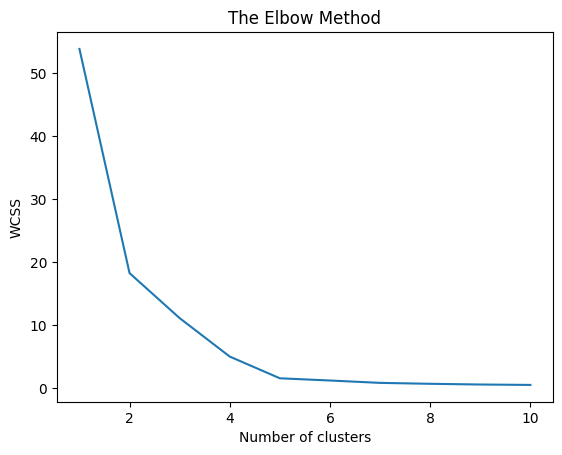

In [268]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [269]:
# From the elbow plot, we can fix value of k as 3
# buliding the kmeans clustering model.
kmeans = KMeans(n_clusters=3, init='k-means++')
# max_iter can be set if we need to fix the number of iterations
y_kmeans = kmeans.fit_predict(X) # output generation

In [270]:
df_fish['Cluster']=y_kmeans
df_fish.head()

,0,1,2,3,4,5,6,Cluster
0,0,0.167474,0.320646,0.320329,0.348141,0.796667,0.635135,1
1,0,0.200692,0.339100,0.338809,0.369900,0.850000,0.689189,1
2,0,0.235294,0.336794,0.342916,0.368087,0.843333,0.864865,1
3,0,0.251211,0.392157,0.394251,0.411605,0.783333,0.621622,1
4,0,0.297578,0.396770,0.394251,0.420671,0.736667,0.864865,1


# visualisation after clustering

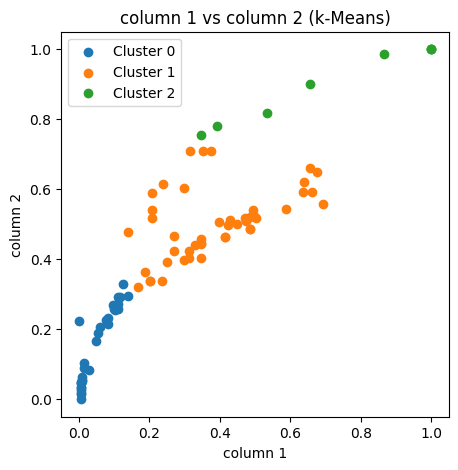

In [271]:
# column 1 vs column 2
plt.figure(figsize=(5,5))
for i in range(3):
  cluster_data=df_fish[df_fish['Cluster']==i]
  plt.scatter(cluster_data[1],cluster_data[2],label=f'Cluster {i}')
plt.title("column 1 vs column 2 (k-Means)")
plt.xlabel('column 1')
plt.ylabel('column 2')
plt.legend()
plt.show()

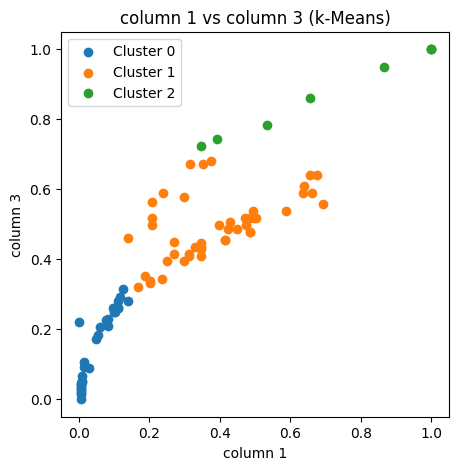

In [272]:
# column 1 vs column 3
plt.figure(figsize=(5,5))
for i in range(3):
  cluster_data=df_fish[df_fish['Cluster']==i]
  plt.scatter(cluster_data[1],cluster_data[3],label=f'Cluster {i}')
plt.title("column 1 vs column 3 (k-Means)")
plt.xlabel('column 1')
plt.ylabel('column 3')
plt.legend()
plt.show()

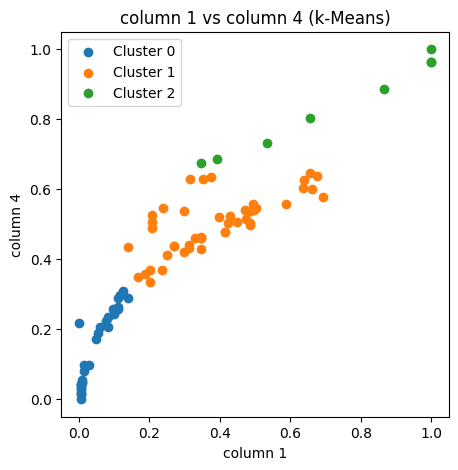

In [273]:
# column 1 vs column 4
plt.figure(figsize=(5,5))
for i in range(3):
  cluster_data=df_fish[df_fish['Cluster']==i]
  plt.scatter(cluster_data[1],cluster_data[4],label=f'Cluster {i}')
plt.title("column 1 vs column 4 (k-Means)")
plt.xlabel('column 1')
plt.ylabel('column 4')
plt.legend()
plt.show()

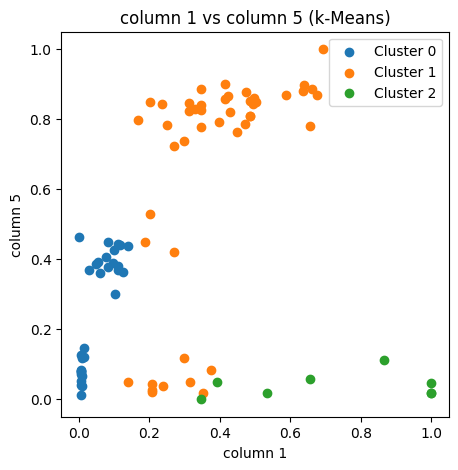

In [274]:
# column 1 vs column 5
plt.figure(figsize=(5,5))
for i in range(3):
  cluster_data=df_fish[df_fish['Cluster']==i]
  plt.scatter(cluster_data[1],cluster_data[5],label=f'Cluster {i}')
plt.title("column 1 vs column 5 (k-Means)")
plt.xlabel('column 1')
plt.ylabel('column 5')
plt.legend()
plt.show()

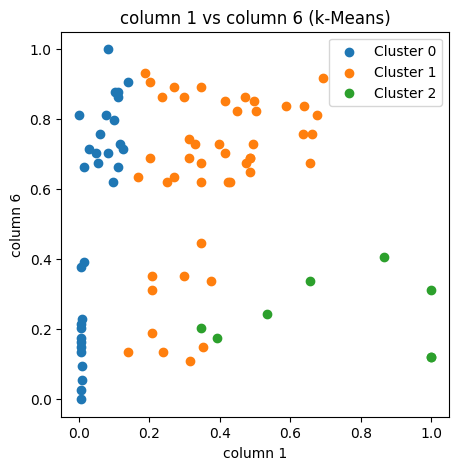

In [275]:
# column 1 vs column 6
plt.figure(figsize=(5,5))
for i in range(3):
  cluster_data=df_fish[df_fish['Cluster']==i]
  plt.scatter(cluster_data[1],cluster_data[6],label=f'Cluster {i}')
plt.title("column 1 vs column 6 (k-Means)")
plt.xlabel('column 1')
plt.ylabel('column 6')
plt.legend()
plt.show()

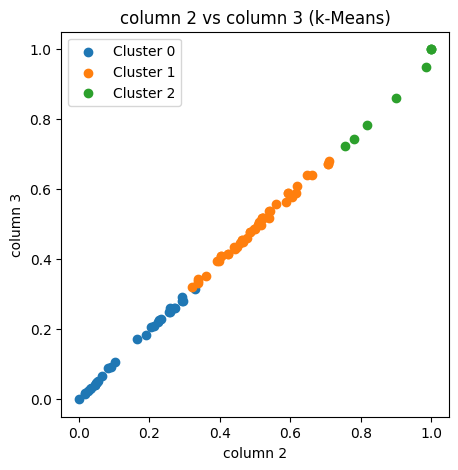

In [276]:
# column 2 vs column 3
plt.figure(figsize=(5,5))
for i in range(3):
  cluster_data=df_fish[df_fish['Cluster']==i]
  plt.scatter(cluster_data[2],cluster_data[3],label=f'Cluster {i}')
plt.title("column 2 vs column 3 (k-Means)")
plt.xlabel('column 2')
plt.ylabel('column 3')
plt.legend()
plt.show()

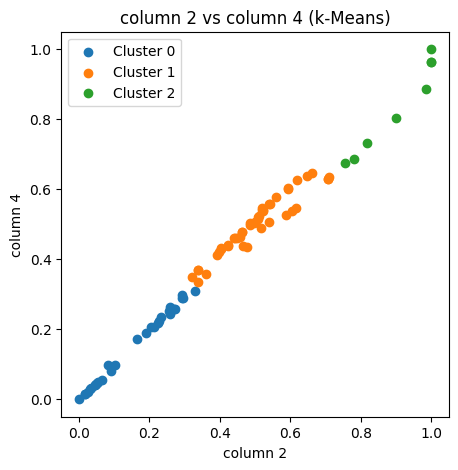

In [277]:
# column 2 vs column 4
plt.figure(figsize=(5,5))
for i in range(3):
  cluster_data=df_fish[df_fish['Cluster']==i]
  plt.scatter(cluster_data[2],cluster_data[4],label=f'Cluster {i}')
plt.title("column 2 vs column 4 (k-Means)")
plt.xlabel('column 2')
plt.ylabel('column 4')
plt.legend()
plt.show()

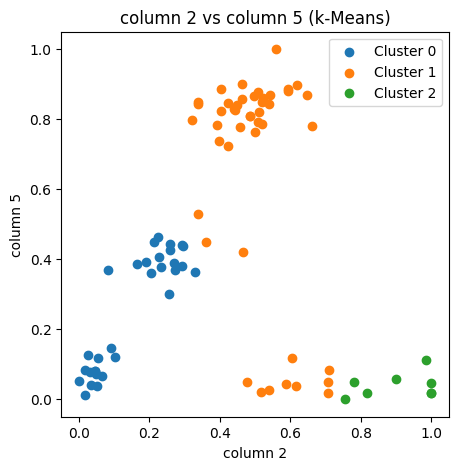

In [278]:
# column 2 vs column 5
plt.figure(figsize=(5,5))
for i in range(3):
  cluster_data=df_fish[df_fish['Cluster']==i]
  plt.scatter(cluster_data[2],cluster_data[5],label=f'Cluster {i}')
plt.title("column 2 vs column 5 (k-Means)")
plt.xlabel('column 2')
plt.ylabel('column 5')
plt.legend()
plt.show()

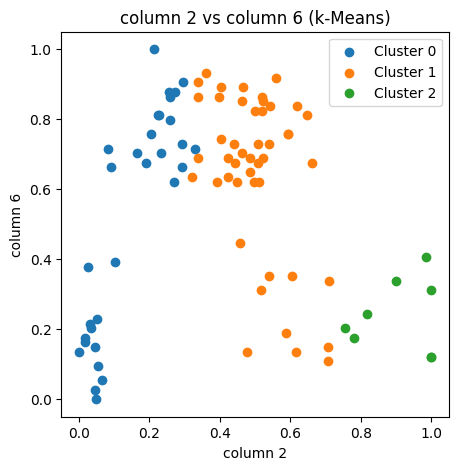

In [279]:
# column 2 vs column 6
plt.figure(figsize=(5,5))
for i in range(3):
  cluster_data=df_fish[df_fish['Cluster']==i]
  plt.scatter(cluster_data[2],cluster_data[6],label=f'Cluster {i}')
plt.title("column 2 vs column 6 (k-Means)")
plt.xlabel('column 2')
plt.ylabel('column 6')
plt.legend()
plt.show()

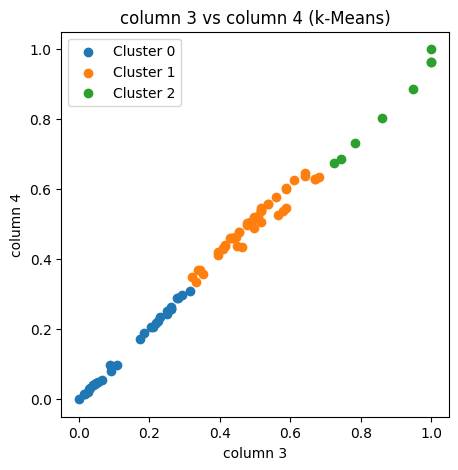

In [280]:
# column 3 vs column 4
plt.figure(figsize=(5,5))
for i in range(3):
  cluster_data=df_fish[df_fish['Cluster']==i]
  plt.scatter(cluster_data[3],cluster_data[4],label=f'Cluster {i}')
plt.title("column 3 vs column 4 (k-Means)")
plt.xlabel('column 3')
plt.ylabel('column 4')
plt.legend()
plt.show()

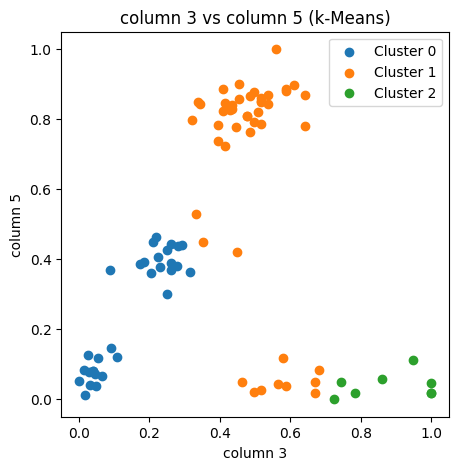

In [281]:
# column 3 vs column 5
plt.figure(figsize=(5,5))
for i in range(3):
  cluster_data=df_fish[df_fish['Cluster']==i]
  plt.scatter(cluster_data[3],cluster_data[5],label=f'Cluster {i}')
plt.title("column 3 vs column 5 (k-Means)")
plt.xlabel('column 3')
plt.ylabel('column 5')
plt.legend()
plt.show()

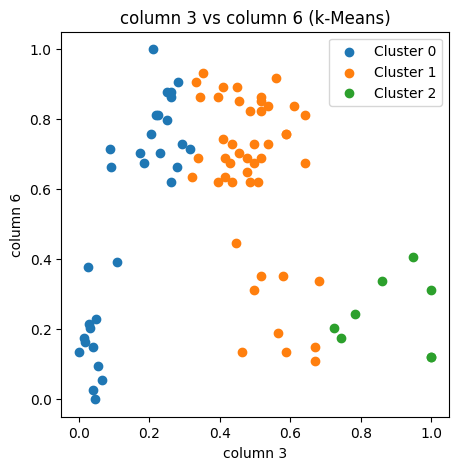

In [282]:
# column 3 vs column 6
plt.figure(figsize=(5,5))
for i in range(3):
  cluster_data=df_fish[df_fish['Cluster']==i]
  plt.scatter(cluster_data[3],cluster_data[6],label=f'Cluster {i}')
plt.title("column 3 vs column 6 (k-Means)")
plt.xlabel('column 3')
plt.ylabel('column 6')
plt.legend()
plt.show()

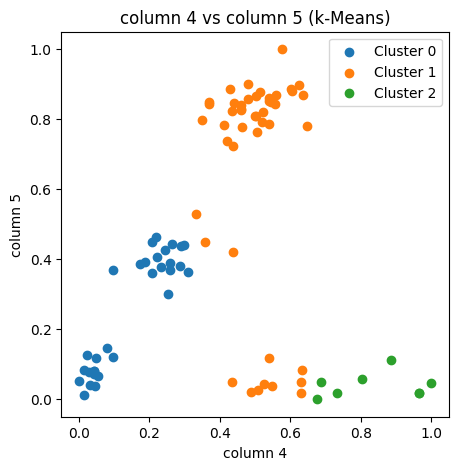

In [283]:
# column 4 vs column 5
plt.figure(figsize=(5,5))
for i in range(3):
  cluster_data=df_fish[df_fish['Cluster']==i]
  plt.scatter(cluster_data[4],cluster_data[5],label=f'Cluster {i}')
plt.title("column 4 vs column 5 (k-Means)")
plt.xlabel('column 4')
plt.ylabel('column 5')
plt.legend()
plt.show()

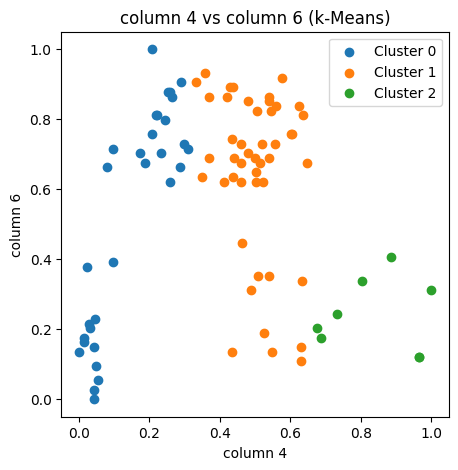

In [284]:
# column 4 vs column 6
plt.figure(figsize=(5,5))
for i in range(3):
  cluster_data=df_fish[df_fish['Cluster']==i]
  plt.scatter(cluster_data[4],cluster_data[6],label=f'Cluster {i}')
plt.title("column 4 vs column 6 (k-Means)")
plt.xlabel('column 4')
plt.ylabel('column 6')
plt.legend()
plt.show()

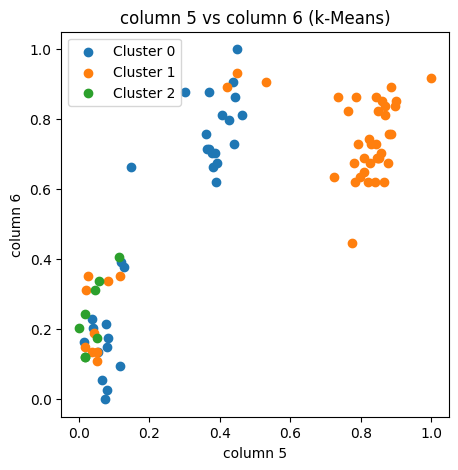

In [285]:
# column 5 vs column 6
plt.figure(figsize=(5,5))
for i in range(3):
  cluster_data=df_fish[df_fish['Cluster']==i]
  plt.scatter(cluster_data[5],cluster_data[6],label=f'Cluster {i}')
plt.title("column 5 vs column 6 (k-Means)")
plt.xlabel('column 5')
plt.ylabel('column 6')
plt.legend()
plt.show()

# Cluster prediction

In [289]:
#predict the cluster
def predict_cluster(a,b,c,d):
  new_data= [[a,b,c,d]]
  cluster=kmeans.predict(new_data)
  return cluster[0]


predicted_cluster= predict_cluster(50,100,20,30)
print("the values belong to the cluster",predicted_cluster)

the values belong to the cluster 1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


# Agglomerative Hieraechical Clustering

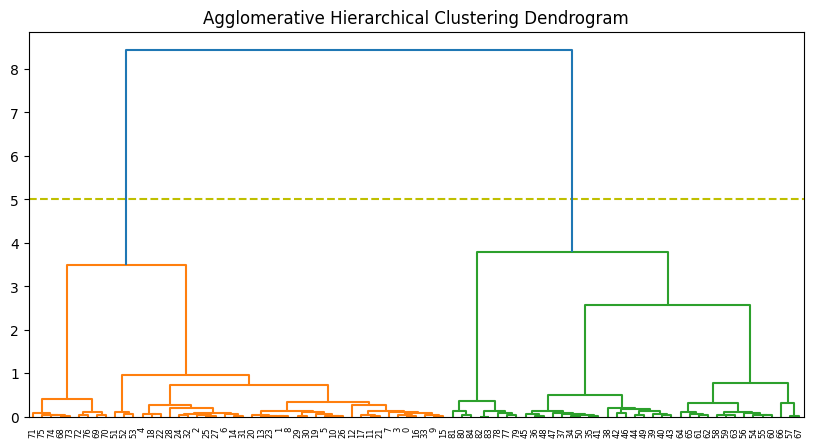

In [332]:
ag_cluster =linkage(X,method='ward') #ward, singlee, centroid
#linkage matrix i.e; agglomerative cluster model


plt.figure(figsize=(10,5))
plt.title('Agglomerative Hierarchical Clustering Dendrogram')
plt.axhline(y=5, color='y',linestyle='--')
dendrogram(ag_cluster)
plt.show()


In [333]:
cluster_label = fcluster(ag_cluster,t=5,criterion="distance")
cluster_label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [334]:
df_fish["Cluster_Agglomerative"]=cluster_label
df_fish.head()

,0,1,2,3,4,5,6,Cluster,Cluster_Agglomerative
0,0,0.167474,0.320646,0.320329,0.348141,0.796667,0.635135,1,1
1,0,0.200692,0.339100,0.338809,0.369900,0.850000,0.689189,1,1
2,0,0.235294,0.336794,0.342916,0.368087,0.843333,0.864865,1,1
3,0,0.251211,0.392157,0.394251,0.411605,0.783333,0.621622,1,1
4,0,0.297578,0.396770,0.394251,0.420671,0.736667,0.864865,1,1


# visualisation after clustering

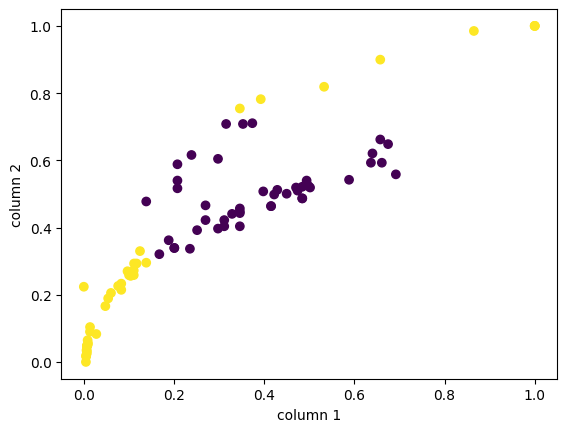

In [335]:
# column 1 vs column 2
plt.scatter(df_fish[1], df_fish[2], c=df_fish['Cluster_Agglomerative'])
plt.xlabel('column 1')
plt.ylabel('column 2')
plt.show()


/tmp/ipython-input-45504414.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


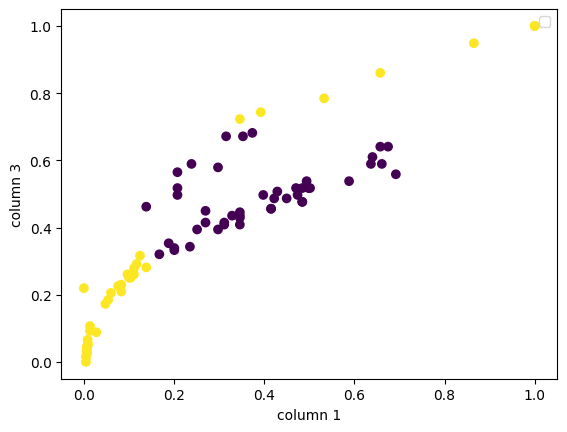

In [336]:
# column 1 vs column 3
plt.scatter(df_fish[1], df_fish[3], c=df_fish['Cluster_Agglomerative'])
plt.xlabel('column 1')
plt.ylabel('column 3')
plt.legend()
plt.show()


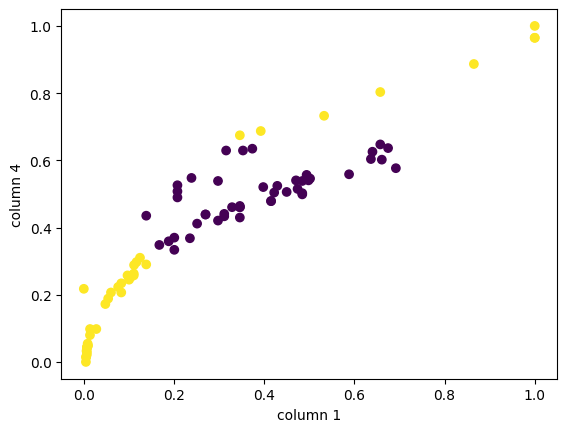

In [337]:
# column 1 vs column 4
plt.scatter(df_fish[1], df_fish[4], c=df_fish['Cluster_Agglomerative'])
plt.xlabel('column 1')
plt.ylabel('column 4')
plt.show()


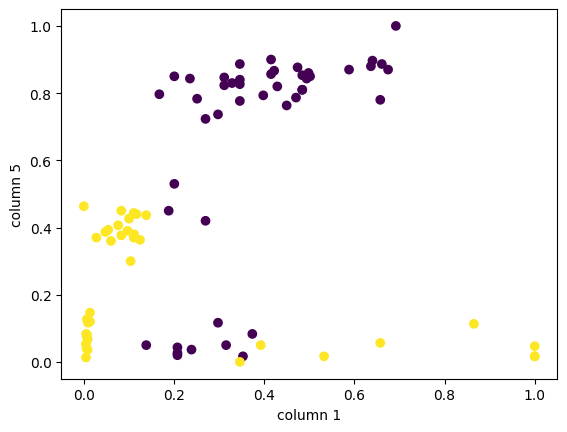

In [338]:
# column 1 vs column 5
plt.scatter(df_fish[1], df_fish[5], c=df_fish['Cluster_Agglomerative'])
plt.xlabel('column 1')
plt.ylabel('column 5')
plt.show()


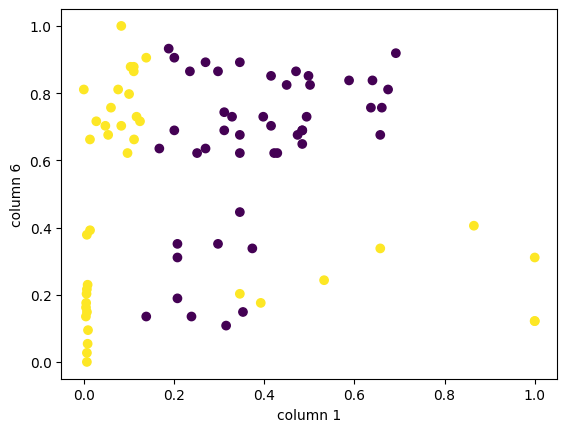

In [339]:
# column 1 vs column 6
plt.scatter(df_fish[1], df_fish[6], c=df_fish['Cluster_Agglomerative'])
plt.xlabel('column 1')
plt.ylabel('column 6')
plt.show()


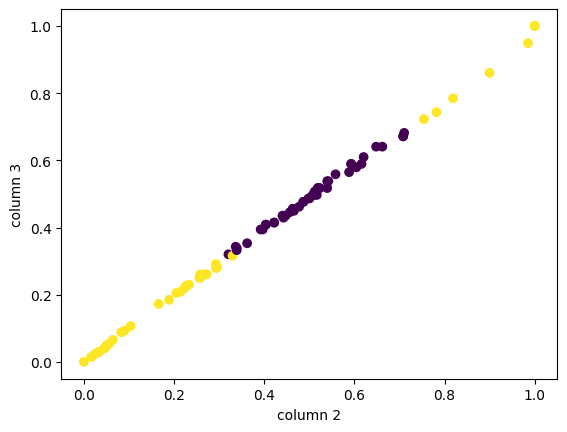

In [340]:
# column 2 vs column 3
plt.scatter(df_fish[2], df_fish[3], c=df_fish['Cluster_Agglomerative'])
plt.xlabel('column 2')
plt.ylabel('column 3')
plt.show()


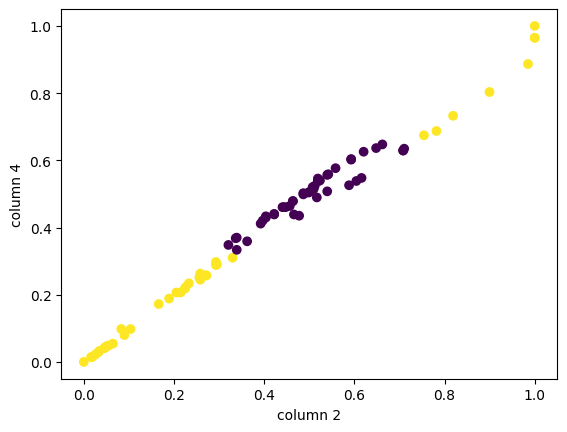

In [341]:
# column 2 vs column 4
plt.scatter(df_fish[2], df_fish[4], c=df_fish['Cluster_Agglomerative'])
plt.xlabel('column 2')
plt.ylabel('column 4')
plt.show()


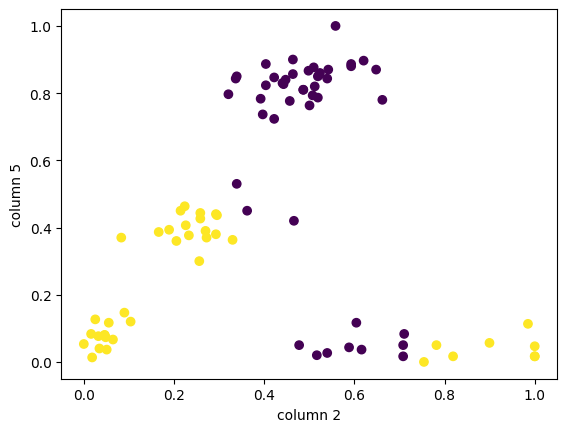

In [342]:
# column 2 vs column 5
plt.scatter(df_fish[2], df_fish[5], c=df_fish['Cluster_Agglomerative'])
plt.xlabel('column 2')
plt.ylabel('column 5')
plt.show()


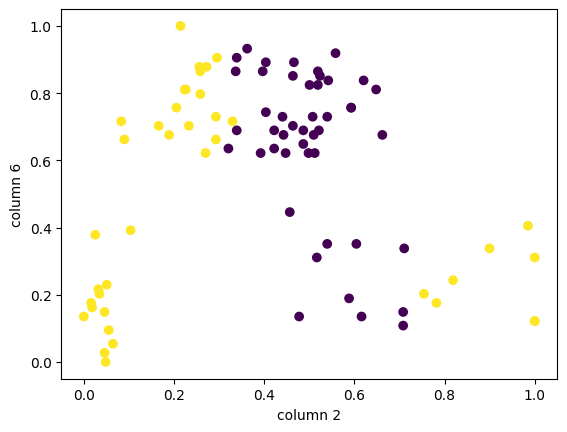

In [343]:
# column 2 vs column 6
plt.scatter(df_fish[2], df_fish[6], c=df_fish['Cluster_Agglomerative'])
plt.xlabel('column 2')
plt.ylabel('column 6')
plt.show()


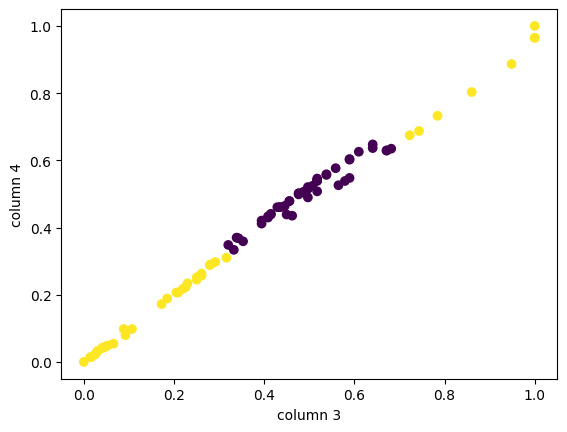

In [344]:
# column 3 vs column 4
plt.scatter(df_fish[3], df_fish[4], c=df_fish['Cluster_Agglomerative'])
plt.xlabel('column 3')
plt.ylabel('column 4')
plt.show()


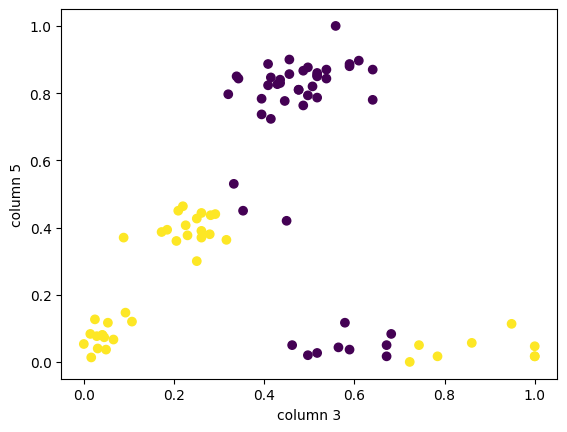

In [345]:
# column 3 vs column 5
plt.scatter(df_fish[3], df_fish[5], c=df_fish['Cluster_Agglomerative'])
plt.xlabel('column 3')
plt.ylabel('column 5')
plt.show()


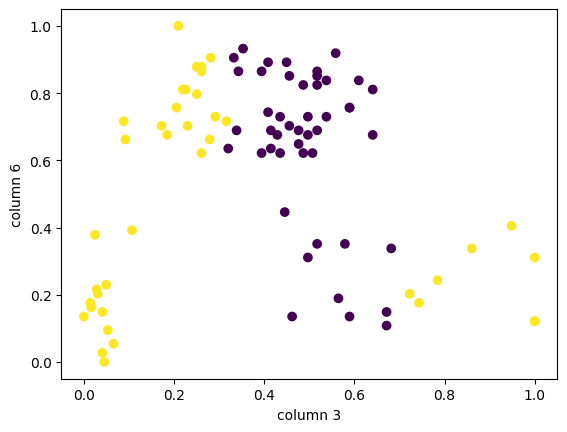

In [346]:
# column 3 vs column 6
plt.scatter(df_fish[3], df_fish[6], c=df_fish['Cluster_Agglomerative'])
plt.xlabel('column 3')
plt.ylabel('column 6')
plt.show()


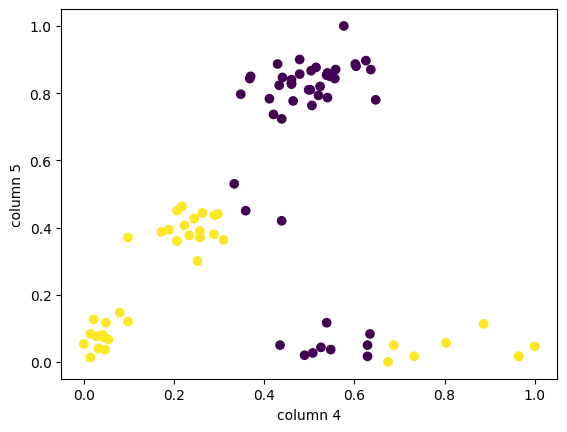

In [347]:
# column 4 vs column 5
plt.scatter(df_fish[4], df_fish[5], c=df_fish['Cluster_Agglomerative'])
plt.xlabel('column 4')
plt.ylabel('column 5')
plt.show()


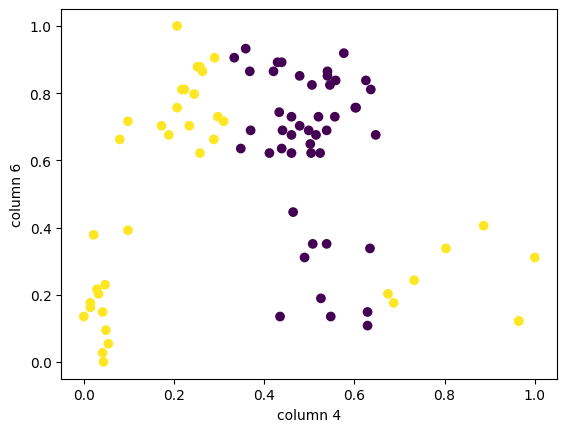

In [348]:
# column 4 vs column 6
plt.scatter(df_fish[4], df_fish[6], c=df_fish['Cluster_Agglomerative'])
plt.xlabel('column 4')
plt.ylabel('column 6')
plt.show()


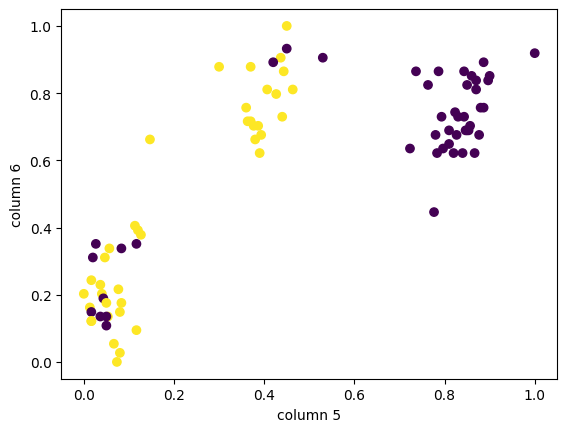

In [349]:
# column 5 vs column 6
plt.scatter(df_fish[5], df_fish[6], c=df_fish['Cluster_Agglomerative'])
plt.xlabel('column 5')
plt.ylabel('column 6')
plt.show()
